## Analysis of the dynamics of population synchrony with phase oscillator models

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt
import popsynch as ps

### Phase oscillators with variable progression rates drawn from a log logistic distribution with location parameter mu = log(pi sigma/sin(pi sigma)) and scale parameter sigma, and perfect initial synchrony

In [2]:
class LLpdf(rv_continuous):
    "Log-logistic distribution"   
    def _pdf(self, x, mu, sigma):
        # Probability density function
        z = (np.log(x)-mu)/sigma
        return np.exp(z)/(sigma*x*(1+np.exp(z))**2)

In [3]:
# Variable Progression Rates
pop_size = 10000
max_t = 4
dt = .1
# The scale parameters are chosen so the analytic coefficient of variation of, 
# given by np.sqrt(np.tan(np.pi*sigma)/(np.pi*sigma)-1), is equal to .1, .2, and .5
sigmas = [.0548049939897770, 0.107709660876926, 0.241695144073817]
cov_dict = {.0548049939897770: 0.1, 0.107709660876926: 0.2, 0.241695144073817: 0.5, 0: 0.0}
num_t = int(max_t/dt)
times = np.linspace(0, max_t-dt, num_t)
times = np.tile(times, (pop_size,1))

synch_dict = dict()
phases_dict = dict()
for sigma in sigmas:
    mu = np.log(np.pi*sigma/np.sin(np.pi*sigma))
    llcv = LLpdf(a=0, name="log_logistic")
    phase_velocities = llcv.rvs(mu, sigma, size=pop_size, random_state=0)
    phase_velocities = np.tile(phase_velocities,(num_t,1)).transpose()
    phase0s = np.zeros((pop_size, num_t))
    phases = np.mod(phase0s+phase_velocities*times,1)
    phases_dict[sigma] = phases
    
    synch = np.zeros(num_t)
    for i in range(num_t):
        s, _ = ps.circ_synchrony(phases[:,i], method='exact')
        synch[i] = s
        
    print(f'completed sigma={sigma}')
        
    synch_dict[sigma] = synch

completed sigma=0.054804993989777
completed sigma=0.107709660876926
completed sigma=0.241695144073817


In [4]:
sns.set_palette(sns.color_palette())
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]

time_ind1 = 5
time_ind2 = 25
for sigma in sigmas:
    sns.kdeplot(phases_dict[sigma][:, time_ind1], ax=ax1, fill=True, clip=(0,1), label=cov_dict[sigma])
    sns.kdeplot(phases_dict[sigma][:, time_ind2], ax=ax2, fill=True, clip=(0,1), label=cov_dict[sigma])

    ax3.plot(times[0,:], synch_dict[sigma], label=cov_dict[sigma])
    
time1 = times[0,time_ind1]
time2 = times[0,time_ind2]
ax3.plot([time1,time1], [0,1], '--', color='black', label=None)
ax3.plot([time2,time2], [0,1], '--', color='black', label=None)

ax1.set_title(f'Time: {time1:.2}')
ax1.set_xlabel('Phase', fontsize=15)
ax1.set_xlim(0,1)
ax1.set_ylabel('Density', fontsize=15)

ax2.set_title(f'Time: {time2:.2}')
ax2.set_xlabel('Phase', fontsize=15)
ax2.set_xlim(0,1)
ax2.set_ylabel(None)

ax3.legend(title="CoV")
ax3.set_xlabel('Time (cycles)', fontsize=15)
ax3.set_xlim(0,4)
ax3.set_ylabel('Synchrony', fontsize=15)
ax3.set_ylim(0,1)

ax1.annotate("(A)", xy=(-.17, 1.05), xycoords="axes fraction", fontsize=20)

plt.savefig('../figs/variable_phase_velocities.svg')

### Phase oscillators with constant progression rate but initial phases drawn randomly from normal distributions with different variances, wrapped to the circle

In [40]:
# Constant Progression Rates
pop_size = 10000
max_t = 4
dt = .1

num_t = int(max_t/dt)
times = np.linspace(0, max_t-dt, num_t)
times = np.tile(times, (pop_size,1))

phase_velocities = np.ones((pop_size,num_t))

# initial conditions will be modelled by a normal distribution wrapped to the circle
ic_sigmas = [.05, 0.1, 0.2]

synch_const_dict = dict()
phases_const_dict = dict()
for sigma in ic_sigmas:
    phase0s = np.mod(st.norm.rvs(0, sigma, size=pop_size, random_state=0),1)
    phase0s = np.tile(phase0s, (num_t,1)).transpose()
    phases = np.mod(phase0s+phase_velocities*times,1)
    phases_const_dict[sigma] = phases
    
    synch = np.zeros(num_t)
    for i in range(num_t):
        s, _ = ps.circ_synchrony(phases[:,i], method='exact')
        synch[i] = s
        
    print(f'completed sigma={sigma}')
    
    synch_const_dict[sigma] = synch

completed sigma=0.05
completed sigma=0.1
completed sigma=0.2


<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\franc\AppData\Local\Temp\ipykernel_25276\34591247.py:31: SyntaxWarning: invalid escape sequence '\s'
  ax3.legend(title="$\sigma$")


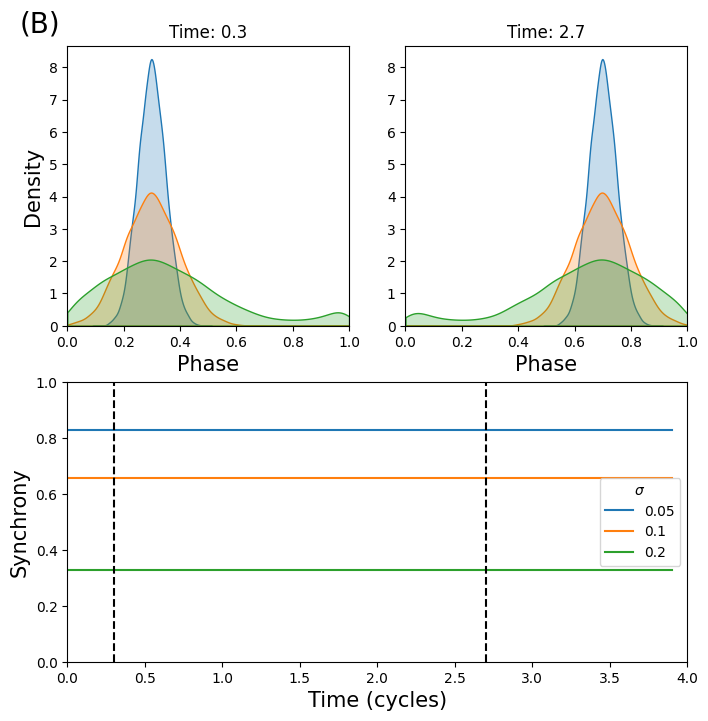

In [42]:
sns.set_palette(sns.color_palette())
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]

time_ind1 = 3
time_ind2 = 27
for sigma in ic_sigmas:
    sns.kdeplot(phases_const_dict[sigma][:, time_ind1], ax=ax1, fill=True, clip=(0,1), label=sigma)
    sns.kdeplot(phases_const_dict[sigma][:, time_ind2], ax=ax2, fill=True, clip=(0,1), label=sigma)

    ax3.plot(times[0,:], synch_const_dict[sigma], label=sigma)
    
time1 = times[0,time_ind1]
time2 = times[0,time_ind2]
ax3.plot([time1,time1], [0,1], '--', color='black', label=None)
ax3.plot([time2,time2], [0,1], '--', color='black', label=None)

ax1.set_title(f'Time: {time1:.2}')
ax1.set_xlabel('Phase', fontsize=15)
ax1.set_xlim(0,1)
ax1.set_ylabel('Density', fontsize=15)

ax2.set_title(f'Time: {time2:.2}')
ax2.set_xlabel('Phase', fontsize=15)
ax2.set_xlim(0,1)
ax2.set_ylabel(None)

ax3.legend(title="$\sigma$")
ax3.set_xlabel('Time (cycles)', fontsize=15)
ax3.set_xlim(0,4)
ax3.set_ylabel('Synchrony', fontsize=15)
ax3.set_ylim(0,1)

ax1.annotate("(B)", xy=(-.17, 1.05), xycoords="axes fraction", fontsize=20)

plt.savefig('../figs/constant_phase_velocities.svg')